In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Conv1D, Input, Dense
from tensorflow.keras.models import Model

In [ ]:
input_array = np.array(
    [9,0,9,0,9,0,9,0,9]
)
input_array = input_array.reshape([1,9,1])


filter_ = np.array(
    #your code
)

filter_ = filter_.reshape(4,1,1)


In [ ]:
input_tensor = Input(shape=[9, 1])
layer = Conv1D(filters=#your code, kernel_size=4, use_bias=False)(input_tensor)

model = Model(input_tensor, layer)
model.layers[1].set_weights([filter_])

#Intent Classification
Packages

In [ ]:
model.predict(input_array)

1/1 [==============================] - 0s 54ms/step


array([[[9.],
        [9.],
        [9.],
        [9.],
        [9.],
        [9.]]], dtype=float32)

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate
from sklearn.metrics import classification_report
import urllib.request

urllib.request.urlretrieve("https://github.com/ajinkyaT/CNN_Intent_Classification/raw/master/data/train_text.npy", filename="train_text.npy")
urllib.request.urlretrieve("https://github.com/ajinkyaT/CNN_Intent_Classification/raw/master/data/test_text.npy", filename="test_text.npy")
urllib.request.urlretrieve("https://github.com/ajinkyaT/CNN_Intent_Classification/raw/master/data/train_label.npy", filename="train_label.npy")
urllib.request.urlretrieve("https://github.com/ajinkyaT/CNN_Intent_Classification/raw/master/data/test_label.npy", filename="test_label.npy")

('test_label.npy', <http.client.HTTPMessage at 0x7f7fe6e0a670>)

In [ ]:
old = np.load
np.load = lambda *a,**k: old(*a, allow_pickle=True, **k)

In [ ]:
intent_train = np.load(open('train_text.npy', 'rb')).tolist()
label_train = np.load(open('train_label.npy', 'rb')).tolist()

intent_test = np.load(open('test_text.npy', 'rb')).tolist()
label_test = np.load(open('test_label.npy', 'rb')).tolist()

In [ ]:
print('훈련용 문장의 수 :', len(intent_train))
print('훈련용 레이블의 수 :', len(label_train))
print('테스트용 문장의 수 :', len(intent_test))
print('테스트용 레이블의 수 :', len(label_test))

훈련용 문장의 수 : 11784
훈련용 레이블의 수 : 11784
테스트용 문장의 수 : 600
테스트용 레이블의 수 : 600


<Axes: >

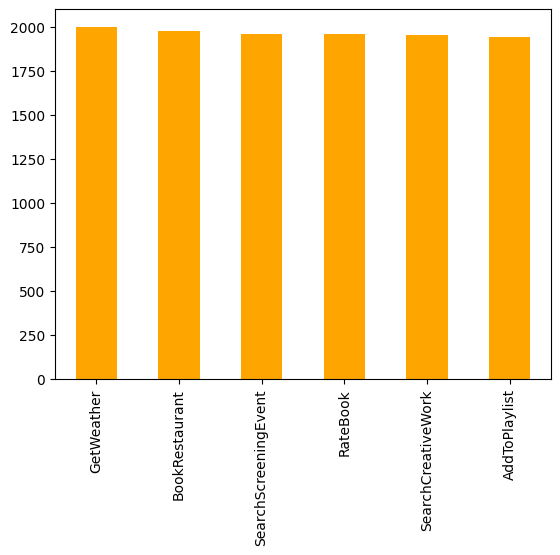

In [ ]:
temp = pd.Series(label_train)
temp.value_counts().plot(kind = 'bar',color='orange')

Encoding

In [ ]:
idx_encode = preprocessing.LabelEncoder()
idx_encode.fit(label_train)

LabelEncoder()

In [ ]:
label_train = idx_encode.#your code(label_train)
label_test = idx_encode.#your code(label_test)

label_idx = dict(zip(list(idx_encode.classes_), idx_encode.transform(list(idx_encode.classes_))))
print(label_idx)


{'AddToPlaylist': 0, 'BookRestaurant': 1, 'GetWeather': 2, 'RateBook': 3, 'SearchCreativeWork': 4, 'SearchScreeningEvent': 5}


Tokenization

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(intent_train)
sequences = tokenizer.#your code(intent_train)
sequences[:5]

[[11, 191, 61, 4, 1, 4013, 1141, 1572, 15],
 [11, 2624, 1573, 3, 14, 15, 939, 82, 256, 188, 548],
 [11, 187, 42, 2625, 4014, 4, 1968],
 [11, 2626, 22, 2627, 4, 14, 192, 27],
 [11, 92, 4, 14, 651, 520, 195]]

In [ ]:
word_index = tokenizer.word_index
vocab_size = # your code
print('단어 집합(Vocabulary)의 크기 :',vocab_size)

단어 집합(Vocabulary)의 크기 : 9870


문장의 최대 길이 : 35
문장의 평균 길이 : 9.364392396469789


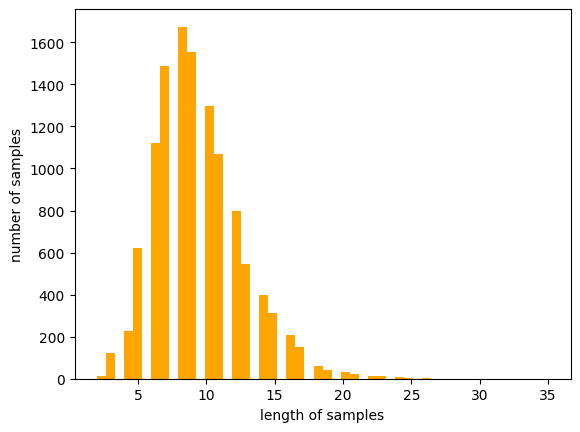

In [ ]:
print('문장의 최대 길이 :',max(len(l) for l in sequences))
print('문장의 평균 길이 :',sum(map(len, sequences))/len(sequences))
plt.hist([len(s) for s in sequences], bins=50, color='orange')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

Padding

In [ ]:
max_len = 35
intent_train = #your code(sequences, maxlen = max_len)
label_train = to_categorical(np.asarray(label_train))
print('전체 데이터의 크기(shape):', intent_train.shape)
print('레이블 데이터의 크기(shape):', label_train.shape)


전체 데이터의 크기(shape): (11784, 35)
레이블 데이터의 크기(shape): (11784, 6)


In [ ]:
print(intent_train[0])
print(label_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   11  191
   61    4    1 4013 1141 1572   15]
[1. 0. 0. 0. 0. 0.]


Shuffle Data

In [ ]:
indices = np.arange(intent_train.shape[0])
np.random.shuffle(indices)
print(indices)

[3365 7548 4731 ... 4763 5181 8352]


In [ ]:
intent_train = intent_train[indices]
label_train = label_train[indices]


In [ ]:
n_of_val = int(0.1 * intent_train.shape[0])
print(n_of_val)

1178


In [ ]:
X_train = intent_train[:-n_of_val]
y_train = label_train[:-n_of_val]
X_val = intent_train[-n_of_val:]
y_val = label_train[-n_of_val:]
X_test = intent_test
y_test = label_test

In [ ]:
print('훈련 데이터의 크기(shape):', X_train.shape)
print('검증 데이터의 크기(shape):', X_val.shape)
print('훈련 데이터 레이블의 개수(shape):', y_train.shape)
print('검증 데이터 레이블의 개수(shape):', y_val.shape)
print('테스트 데이터의 개수 :', len(X_test))
print('테스트 데이터 레이블의 개수 :', len(y_test))

훈련 데이터의 크기(shape): (10606, 35)
검증 데이터의 크기(shape): (1178, 35)
훈련 데이터 레이블의 개수(shape): (10606, 6)
검증 데이터 레이블의 개수(shape): (1178, 6)
테스트 데이터의 개수 : 600
테스트 데이터 레이블의 개수 : 600


Embedding

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2023-03-30 05:55:29--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-03-30 05:55:29--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-03-30 05:55:29--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
embedding_dict = dict()
f = open(os.path.join('glove.6B.100d.txt'), encoding='utf-8')
for line in f:
    word_vector = line.split()
    word = word_vector[0]
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32') # 100개의 값을 가지는 array로 변환
    embedding_dict[word] = word_vector_arr
f.close()

print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [ ]:
print(embedding_dict['playlist'])
print(len(embedding_dict['playlist']))

[-0.6528   -0.087126  0.069655 -0.5048    0.79019   0.65051   0.37976
  0.20751   0.10412   0.95853   0.32161   0.36098  -0.21461  -0.59657
  0.362    -0.3951   -0.58838   0.324     1.0287    0.4569   -0.24372
 -0.26496   0.1975   -0.78302   0.17163  -0.076737  0.83705   0.58432
  0.71843   0.57522   0.11688   0.011023 -0.53676   0.73441   0.09844
  0.8927   -0.211     0.015395 -0.2928   -1.3875    1.0756    0.13387
  0.20341   0.86427  -0.096482 -0.06536  -0.52669  -0.36076   0.76218
  0.3854   -0.39054   0.014445  0.20772   0.41165  -0.16024  -0.66007
  0.13666  -0.34246   0.4382    0.49848   0.31481  -0.13102  -0.17373
  0.061581  1.1336   -0.25673  -0.20472  -0.72834   0.38054  -0.35237
  0.033096  0.43066  -0.36101  -0.096088 -0.15556  -0.028297  0.32882
  0.019752  0.5847   -0.12215  -0.53096  -0.53096   0.25334  -0.13078
 -0.058533  0.40602  -0.23493   0.048578 -0.34938   1.0172   -0.44
  1.2431   -0.32026  -0.22517  -0.079004 -0.3919    0.18961  -0.42287
 -0.028161  0.92989 ]
1

In [ ]:
embedding_dim = 100
embedding_matrix = np.zeros(#your code)

In [ ]:
np.shape(embedding_matrix)

(9870, 100)

In [ ]:
for word, i in word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

Build Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate

In [ ]:
filter_sizes = [2,3,5]
num_filters = 512
drop = 0.5

In [ ]:
model_input = Input(shape = (#your code))
z = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                      input_length=max_len, trainable=False)(model_input)

conv_blocks = []

for sz in filter_sizes:
    conv = Conv1D(filters = num_filters,
                         kernel_size = sz,
                         padding = "valid",
                         activation = "relu",
                         strides = 1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv = Flatten()(conv)
    conv_blocks.append(conv)

z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(drop)(z)
model_output = Dense(len(label_idx), activation=#your code)(z)

model = Model(model_input, model_output)

model.compile(loss=#your code,
              optimizer='adam',
              metrics=['acc'])


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 35)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 35, 100)      987000      ['input_1[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 34, 512)      102912      ['embedding[0][0]']              
                                                                                                  
 conv1d_1 (Conv1D)              (None, 33, 512)      154112      ['embedding[0][0]']              
                                                                                              

In [ ]:
history = model.fit(X_train, y_train,
          batch_size=64,
          epochs=10,
          validation_data = (X_val, y_val))


Epoch 1/10
166/166 [==============================] - 20s 111ms/step - loss: 0.2127 - acc: 0.9326 - val_loss: 0.0744 - val_acc: 0.9796
Epoch 2/10
166/166 [==============================] - 19s 115ms/step - loss: 0.0495 - acc: 0.9859 - val_loss: 0.0572 - val_acc: 0.9805
Epoch 3/10
166/166 [==============================] - 18s 108ms/step - loss: 0.0290 - acc: 0.9923 - val_loss: 0.0472 - val_acc: 0.9839
Epoch 4/10
166/166 [==============================] - 21s 125ms/step - loss: 0.0181 - acc: 0.9952 - val_loss: 0.0477 - val_acc: 0.9830
Epoch 5/10
166/166 [==============================] - 18s 108ms/step - loss: 0.0126 - acc: 0.9965 - val_loss: 0.0430 - val_acc: 0.9839
Epoch 6/10
166/166 [==============================] - 22s 131ms/step - loss: 0.0092 - acc: 0.9976 - val_loss: 0.0530 - val_acc: 0.9839
Epoch 7/10
166/166 [==============================] - 18s 108ms/step - loss: 0.0081 - acc: 0.9979 - val_loss: 0.0597 - val_acc: 0.9856
Epoch 8/10
166/166 [==============================] - 1

Evaluate


In [ ]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_len)


In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.argmax(axis=-1) # 예측된 정수 시퀀스로 변환

19/19 [==============================] - 1s 20ms/step


In [ ]:
y_predicted = idx_encode.inverse_transform(y_predicted) 
y_test = idx_encode.inverse_transform(y_test) 

In [ ]:
print('accuracy: ', sum(y_predicted == y_test) / len(y_test))
print("Precision, Recall and F1-Score:\n\n", classification_report(y_test, y_predicted))

accuracy:  0.985
Precision, Recall and F1-Score:

                       precision    recall  f1-score   support

       AddToPlaylist       1.00      1.00      1.00       100
      BookRestaurant       0.99      1.00      1.00       100
          GetWeather       1.00      0.98      0.99       100
            RateBook       1.00      1.00      1.00       100
  SearchCreativeWork       0.93      1.00      0.97       100
SearchScreeningEvent       0.99      0.93      0.96       100

            accuracy                           0.98       600
           macro avg       0.99      0.98      0.98       600
        weighted avg       0.99      0.98      0.98       600

